# Response Themes for "What aspects of Jupyter Notebook make it pleasant to use in your workflow?"

* Goal: Extract theme keywords from `pleasant_aspects` responses.
* Data: Output from 2_clean_survey.ipynb notebook (`survey_short_columns.csv`)
* Process from [1_ux_survey_review.ipynb](1_ux_survey_review.ipynb):

> Moving forward, here's a semi-automatic procedure we can follow for identifying themes across questions:
> 1. Take a random sample of question responses
> 2. Write down common theme keywords
> 3. Search back through the responses using the theme keywords
> 4. Expand the set of keywords with other words seen in the search results
> 5. Repeat for all themes and questions
> Later, we can use a fully automated topic modeling approach to validate our manually generated themes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

Make sure the samples come up the same for anyone that re-runs this.

In [4]:
rs = np.random.RandomState(123)

In [5]:
pd.set_option('max_colwidth', 1000)

In [6]:
df = pd.read_csv('survey_short_columns.csv')

In [7]:
def show(series):
    '''Make random samples easier to read.'''
    for i, value in enumerate(series):
        print('{}) {}'.format(i, value), end='\n\n')

In [8]:
responses = pd.concat([df.pleasant_aspects_1, df.pleasant_aspects_2, df.pleasant_aspects_3])

In [9]:
assert len(responses) == len(df) * 3

In [10]:
responses.isnull().value_counts()

True     3953
False    1165
dtype: int64

In [11]:
responses = responses.dropna()

## Initial Samples

I ran the sampling code below 5 times and manually built up the initial set of keywords seen commonly across them. I formed groups of conceptually related keywords. Then I tried to assign a simple label to each group.

In [12]:
show(responses.sample(20, random_state=rs))

0) Ease of use

1) Clean interface

2) Integration with pandas

3) Little chunks

4) Software repository via JSON

5) Easily access my django models

6) Easy to share analysis with others

7) nbconvert

8) REPL and visualization

9) Executable cells

10) Graphs, doc and code integration

11) PDF export

12) Inline plots, markdown, latex

13) plotting

14) Keyboard shortcuts.

15) Rich media

16) graph tools integrated

17) Open sourceness, reproducibility of various results from the Internet

18) Quick and easy access to Python

19) Persistence



In [510]:
themes = {
    'ux': ['ux|interface|g?ui($|\W)', 'eas(e|y|iness)(\sof|\sto)?(\suse|install)?', 'design', 
           'navigation', 'web|browser|http', 'intuitive', 'aesthetic(s|ally)',
           'completion', 'simpl(e|icity)|clean', 'keyboard|hotkeys?|short-?cuts?|keybindings?', 
           'style', 'editor', 'help', 'responsive', 'pleasure to use', 
           'looks (nice|great)|appealing|beautiful|pretty|elegant|appearance', 
           'modal',
           'doc(s|umentation)?($|\W)', ],
    'ecosystem': ['community|ecosystem|open source', 'librar(y|ies)', 'tool(ing)?',
                  'standard', 'common', 'pandas', 'matplotlib', 'github', 'rpy2', 'ggplot2?', 'magics?',
                  'nbgrader', 'sqlalchemy', 'bokeh'],
    'cost': ['cost', 'free', 'cheaper', 'license', ],
    'integrated_content': ['in-?line', 'links', 'latex', 'mathjax',
                'mark(up|down)|HTML', 'combine|(text|code) (and|with)|and (code|text)', 
                'embedded', 'rich (content|output)|figures?|pictures?|images?|media',
                'all(\s|-)in(\s|-)one|one place', 'notes|comments', 'integrated?', 
                'contained', 'litera(te|cy) programming', ],
    'visualization': ['graph(s|ic|ing)', 'plot(ting)?', 'vi(s|z)ualization',
                      'visual|eye candy', '(ipy)?widgets', '(display|see) (data|charts?|plots?)',
                      ],
    'dissemination': ['shar(e|ing)', 'export', 'nbconvert', 'pdf', 'reproducibility', 'convert', 'others', 
                      'teaching', 'collaborat(e|ion|ive|ors)', 'slides?', 'render', 
                      'nbviewer', 'presentations?', 'repeatable', 'team', 'tell a story'],
    'organization': ['folder structure', 'organiz(e|ation)', ],
    'hosting': ['setup', 'install', 'server', 'portability', 'hosting', 'cloud', 'platform', 'remote',
                'docker', 'aws', 'on-?line', 'deployment', 'centralized'],
    'interactivity': ['repl', 'cells?', 'cell execution', 
                      'interact(ive|ivity|ion)|live|immediate|quick|instant|rapid|fast|speed', 
                      'run', 'iterative|feedback|dynamic', 'flexib(le|ility)', 
                      'workflow', 'iterat(e|ion)', 'explor(e|atory)|experiment|sandbox|prototype', 
                      ],
    'language': ['i?python', 'languages?', 'bash',],
    'persistence': ['persist(ence|ent)?', '(auto)?sav(e|ing)', 'snapshot', 
                    'history', 'state', 'permanent record', 'log'],
    'stability': ['robust', 'stable', 'reliable', 'reliability', 'mature', 'full featured'],
    'extensible': ['exten(d|sible|sions)', 'plugin', 'custom', 'modular', 'expanding',
                   'kernels|backends|kernel support']
}

## Coverage Improvement

I next ran the code below to associate the theme labels with the responses. I then iterated on running the code below to find reponses without labels. I expanded the list of keywords and themes above in order to improve coverage.

In [511]:
import re

In [512]:
def keywords_or(text, keywords):
    for keyword in keywords:
        if re.search('(^|\W+){}'.format(keyword), text, re.IGNORECASE):
            return True
    return False

In [513]:
def tag_themes(data, themes):
    tagged = data.to_frame()
    tagged['themes'] = ''
    for theme, keywords in themes.items():
        results = data.map(lambda text: keywords_or(text, keywords))
        tagged.loc[results, 'themes'] += theme + ','
        print(theme, results.sum())
    return tagged

In [514]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

stability 6
hosting 71
cost 5
ecosystem 80
persistence 33
integration 44
visualization 161
language 58
organization 4
extensible 22
interactivity 234
dissemination 109
ux 355
integrated_content 259


1    717
2    289
0    113
3     39
4      6
5      1
Name: themes, dtype: int64

In [519]:
tagged[tagged.themes.str.len() == 0].sample(20, random_state=rs)

,0,themes
966,2 tier architecture,
1427,how it keeps everything loaded and current even if you close and re-open,
918,readability,
669,Literate statistical analysis,
311,Little chunks,
141,"Most everything, love it!",
1503,Powerful,
474,Versatility,
298,my notebook,
887,switch kernals,


## Precision Check

I then studied a sample of responses for each theme to see if there major inaccuracies in their application (e.g., string matches that are too fuzzy).

In [520]:
tagged = tag_themes(responses, themes)
tagged.themes.str.count(',').value_counts()

stability 6
hosting 71
cost 5
ecosystem 80
persistence 33
integration 44
visualization 161
language 58
organization 4
extensible 22
interactivity 234
dissemination 109
ux 355
integrated_content 259


1    717
2    289
0    113
3     39
4      6
5      1
Name: themes, dtype: int64

In [521]:
from IPython.display import display, clear_output

In [522]:
# for key in themes:
#     clear_output()
#     size = min([10, len(tagged[tagged.themes.str.contains(key)])])
#     display(tagged[tagged.themes.str.contains(key)].sample(size))
#     if input('Showing `{}`. Type Enter to continue, "q" to stop.'.format(key)) == 'q':
#         break

I also looked at responses with multiple themes to fine tune them, and catch duplication of words in multiple themes.

In [523]:
tagged[tagged.themes.str.count(',') == 2].sample(20, random_state=rs)

,0,themes
666,Organization of a python script into blocks,"language,organization,"
1487,server-client browser interface,"hosting,ux,"
312,Interactive widgets,"visualization,interactivity,"
1297,Graphics produced inline,"visualization,integrated_content,"
496,Easy to write and run small blocks of code,"interactivity,ux,"
1343,"Open sourceness, reproducibility of various results from the Internet","ecosystem,dissemination,"
1032,Inline graph visualization,"visualization,integrated_content,"
271,Code + figures together allow for fast prototyping,"interactivity,integrated_content,"
99,Maintaining state in a running notebook,"persistence,interactivity,"
828,pretty easy to export,"dissemination,ux,"


## Keyword Frequencies

In [524]:
import matplotlib
import seaborn

In [525]:
counts = {}

In [526]:
for theme, keywords in themes.items():
    for keyword in keywords:
        hits = responses.map(lambda text: keywords_or(text, [keyword]))
        counts[keyword] = hits.sum()

In [527]:
hist = pd.Series(counts).sort_values()

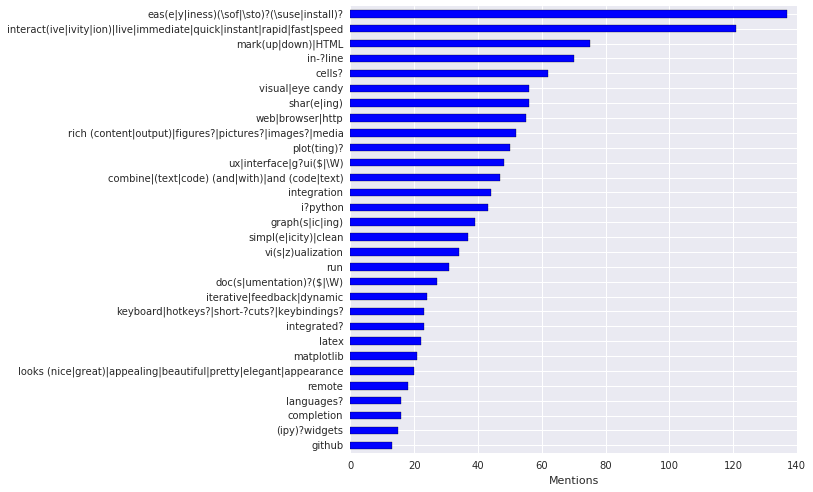

In [528]:
ax = hist[-30:].plot.barh(figsize=(8, 8))
_ = ax.set_xlabel('Mentions')

## Persist

I save off the themes and keywords to a DataFrame with the same index as the original so that the entries can be tagged.

In [529]:
column = 'pleasant_aspects'

In [530]:
themes_df = tagged.themes.to_frame()

In [531]:
themes_df = themes_df.rename(columns={'themes' : column+'_themes'})

In [532]:
themes_df[column+'_keywords'] = ''

In [533]:
for theme, keywords in themes.items():
    for keyword in keywords:
        results = responses.map(lambda text: keywords_or(text, [keyword]))
        if not results.sum(): continue
        themes_df.loc[results, column+'_keywords'] += keyword + ','

In [534]:
themes_df[column+'_themes'] = themes_df[column+'_themes'].str.rstrip(',')
themes_df[column+'_keywords'] = themes_df[column+'_keywords'].str.rstrip(',')

Up above, I merged the three response fields for the question into one common pool which means we can have duplicate index value in the themes DataFrame. We need to squash these down and remove duplicates.

In [535]:
def union(group_df):
    '''Gets the set union of themes and keywords for a given DataFrame.'''
    themes = group_df[column+'_themes'].str.cat(sep=',')
    themes = list(set(themes.split(',')))
    themes = ','.join(themes)
    
    keywords = group_df[column+'_keywords'].str.cat(sep=',')
    keywords = list(set(keywords.split(',')))
    keywords = ','.join(keywords)
    return pd.Series([themes, keywords], index=[column+'_themes', column+'_keywords'])

We group by the index and union the themes and keywords.

In [537]:
themes_df = themes_df.groupby(themes_df.index).apply(union)

In [538]:
themes_df.head()

,pleasant_aspects_themes,pleasant_aspects_keywords
1,"visualization,ux","(ipy)?widgets,keyboard|hotkeys?|short-?cuts?|keybindings?"
5,"integration,integrated_content,language","integration,notes|comments,i?python,rich (content|output)|figures?|pictures?|images?|media,all(\s|-)in(\s|-)one|one place"
6,"visualization,integrated_content,dissemination,ecosystem,ux","github,shar(e|ing),combine|(text|code) (and|with)|and (code|text),(ipy)?widgets,plot(ting)?,eas(e|y|iness)(\sof|\sto)?(\suse|install)?"
7,",integration,interactivity",",integration,interact(ive|ivity|ion)|live|immediate|quick|instant|rapid|fast|speed"
9,"language,ux,hosting,persistence","docker,i?python,web|browser|http,state"


The themes DataFrame should have as many rows as there are non-null responses in the original DataFrame.

In [540]:
assert len(themes_df) == len(df[[column+'_1', column+'_2', column+'_3']].dropna(how='all'))

In [541]:
themes_df.to_csv(column + '_themes.csv', sep=';')